In [1]:
"""Library"""
import matplotlib.pyplot as plt
import pandas as pd
from common import (alpha_beta, data_path, date_col, missing_code, price_col,
                    projectpath, symbol_col)

In [2]:
select = "factor"
with_macro = True

"""Load data"""
data = pd.read_csv(data_path[select])
data[date_col] = pd.to_datetime(data[date_col])
data = data.set_index([symbol_col, date_col])\
    .replace(missing_code, float("NaN"))\
    .astype("float")

data.dropna().head()

excess_returns       hml     r12_7      r2_1      rmrf  \
symbol date                                                                 
3IN    2008-04-30        0.024058  0.009833  0.011650  0.031747  0.058589   
       2008-05-31        0.008577 -0.029344  0.003494  0.024058 -0.006106   
       2008-06-30       -0.014719 -0.027738  0.006356  0.008577 -0.074837   
       2008-07-31       -0.006258 -0.069655  0.047877 -0.014719 -0.040168   
       2008-08-31       -0.079115 -0.001523  0.099332 -0.006258  0.045881   

                        smb       umd  
symbol date                            
3IN    2008-04-30 -0.049409  0.068718  
       2008-05-31 -0.010052  0.044772  
       2008-06-30 -0.024877  0.135133  
       2008-07-31  0.016760  0.001473  
       2008-08-31 -0.006549 -0.095469

In [3]:
sdf = pd.read_csv(
    f"{projectpath}/data/results/sdf_uk_{select}_macro_{with_macro}.csv"
)
sdf["date"] = pd.to_datetime(sdf["date"])
sdf = sdf.set_index("date")
sdf = 1 - sdf

sdf.dropna().head()

,sdf
date,
1998-01-31,-0.060436
1998-02-28,1.096662
1998-03-31,1.027546
1998-04-30,0.193612
1998-05-31,1.025856


In [4]:
sdf.describe()

,sdf
count,240.000000
mean,0.615177
std,0.329119
min,-0.060436
25%,0.351075
50%,0.563673
75%,0.859845
max,1.525673


In [5]:
data = data.combine_first(sdf)
data = data[[price_col, "sdf"]]

data.dropna().head()

excess_returns       sdf
symbol date                                
3IN    2008-04-30        0.024058  1.063621
       2008-05-31        0.008577  0.615354
       2008-06-30       -0.014719  0.671074
       2008-07-31       -0.006258  0.448058
       2008-08-31       -0.079115  0.484201

In [6]:
"""Alpha beta"""
coef = alpha_beta(data)

coef

,sdf,train_intercept,valid_intercept,test_intercept
3IN,0.036509,-0.019423,0.007330,0.007330
888,0.030991,-0.012212,0.005527,0.005527
88E,-0.287193,0.126863,0.041079,0.041079
AAIF,-0.004439,0.008813,-0.002573,-0.002573
AAL,0.077043,-0.038074,-0.013027,-0.013027
...,...,...,...,...
ZIOC,0.168654,-0.188698,0.145515,0.145515
ZOL,-0.154362,0.115696,-0.049862,-0.049862
ZOO,-0.011473,-0.017322,0.029008,0.029008
ZTF,-0.017642,0.006629,0.022473,0.022473


In [7]:
coef["train_intercept"].abs().describe()

count    826.000000
mean       0.039328
std        0.051212
min        0.000023
25%        0.008521
50%        0.021529
75%        0.049660
max        0.610067
Name: train_intercept, dtype: float64

In [8]:
coef["valid_intercept"].abs().describe()

count    826.000000
mean       0.021074
std        0.023854
min        0.000138
25%        0.007148
50%        0.013696
75%        0.025469
max        0.216707
Name: valid_intercept, dtype: float64

In [9]:
coef["test_intercept"].abs().describe()

count    826.000000
mean       0.021074
std        0.023854
min        0.000138
25%        0.007148
50%        0.013696
75%        0.025469
max        0.216707
Name: test_intercept, dtype: float64

<AxesSubplot:>

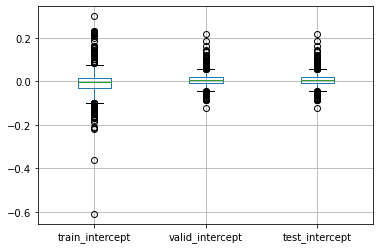

In [10]:
coef.drop(columns=["sdf"]).boxplot()

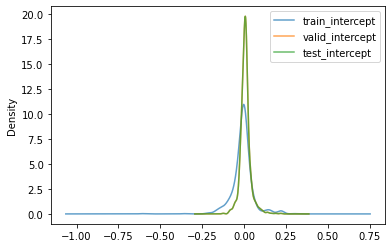

In [11]:
coef["train_intercept"].plot.kde(alpha=0.7)
coef["valid_intercept"].plot.kde(alpha=0.7)
coef["test_intercept"].plot.kde(alpha=0.7)
plt.legend()

In [12]:
# export results
coef.to_csv(f"{projectpath}/data/alpha/gan_{select}_macro_{with_macro}.csv")